### Exploratory Data Analysis - Predicting Breast Tumor Diagnosis with Machine Learning

**Breast Cancer Wisconsin Diagnostic Dataset**<br>
Wolberg, W., Mangasarian, O., Street, N., & Street, W. (1993). Breast Cancer Wisconsin (Diagnostic) [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

#### Variables
1) ID number
2) Diagnosis (M = malignant, B = benign)

3-32)
Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)

Go to [Kaggle](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data) for variable definitions

### Imports

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from IPython.display import HTML

### Load Dataset

In [2]:
# Load the dataset
df = pd.read_csv('raw_tumor_feature_data.csv')
df.head(3)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


### Recall the YData Profiling Report
In [`01_data_wrangling.ipynb`](https://github.com/geojenk/BreastCancerMachineLearning/blob/559360437eae93e53a85f9cb276545cdae7b806a/01_data_wrangling.ipynb), I made a YData report of the tumor dataset. 

The html file is too large to embed in a Jupyter notebook, but you can view it in your browser.

[Link to tumor data profile](https://raw.githack.com/geojenk/BreastCancerMachineLearning/refs/heads/main/tumor_data_profile.html)

### Summary Statistics

In [21]:
# Set 'id' as the index
df = df.set_index('id')
df.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
fractal_dimension_mean,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Separate into 3 Datasets
The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image,
resulting in 30 features. 

For instance,
- `radius_mean` is the mean radius 
- `radius_se` is the standard error. 
- `radius_worst` is the mean of the 3 "worst" or largests values. 

I will subset the data by these three categories before exploring relationships between the variables. 

In [29]:
df_mean = df.loc[:, df.columns.str.endswith('_mean')]
df_se = df.loc[:, df.columns.str.endswith('_se')]
df_worst = df.loc[:, df.columns.str.endswith('_worst')]

### Mean Variables:

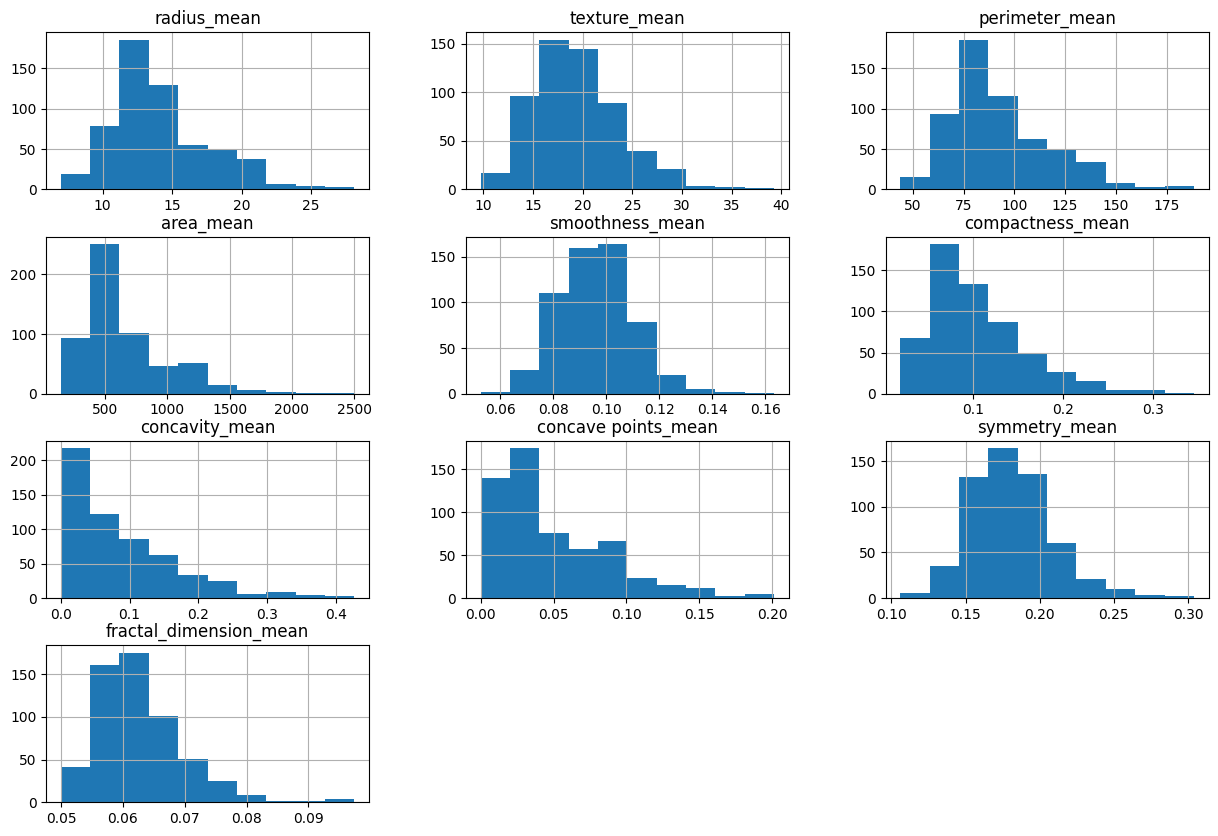

In [35]:
# Create histograms for each mean variable
df_mean.hist(figsize=(15,10));

#### Notes 
Some variables are heavily skewed to the right. None are skewed left. During modeling, it may be necessary to make transformations.

Heavily right-skewed variables: `area_mean`, `compactness_mean`, `concavity_mean`, `concave_points_mean`

There may also be some outliers, like on the upper tail of `fractal_dimension_mean`. Boxplots should make these easier to see. 

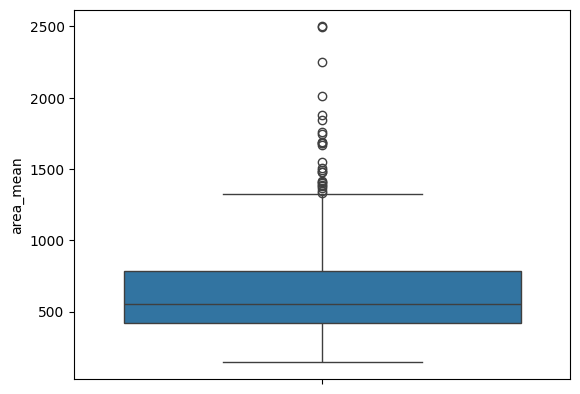

In [ ]:
# Make a boxplot of area_mean separately, since it has the largest values 
sns.boxplot(df_mean['area_mean']);

`area_mean ` has many possible outliers

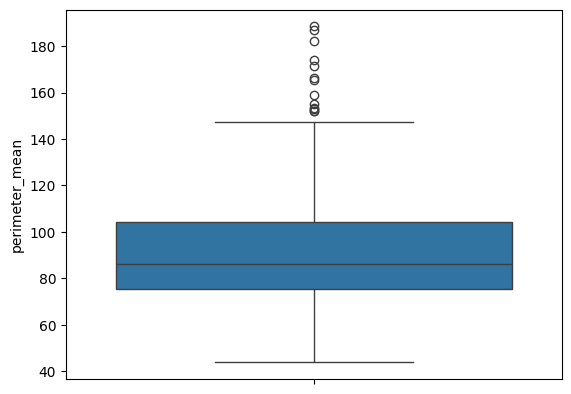

In [48]:
# Make a boxplot of perimeter_mean separately, since it has the second largest values 
sns.boxplot(df_mean['perimeter_mean']);

`perimter_mean ` also has many possible outliers

<Axes: >

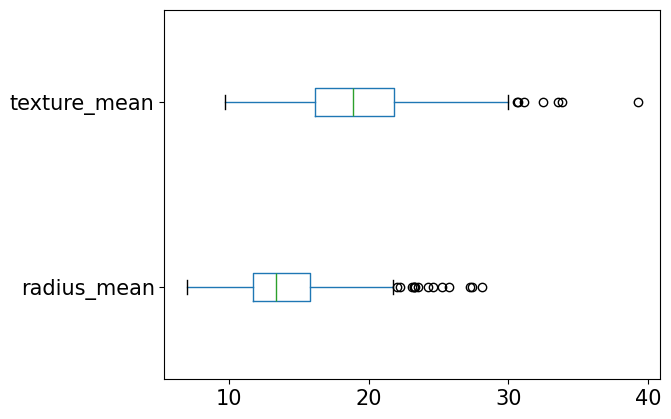

In [55]:
# Now plot the middle variables
df_mean[['radius_mean','texture_mean']].boxplot(grid=False,vert=False,fontsize=15)

`texture_mean` and `radius_mean` are also following the right-skew-with-upper-outliers pattern

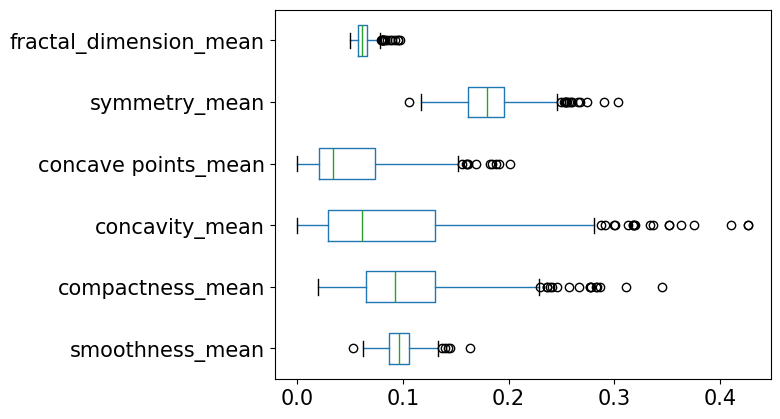

In [59]:
# Finally, plot the smallest variables
df_mean.loc[:,'smoothness_mean':'fractal_dimension_mean'].boxplot(grid=False,vert=False,fontsize=15);

All of our mean variables are right-skewed with upper outliers! I wonder if these outliers are associated with higher "worst" values. I'll check out our "worst" dataset next.  

Two variables have lower outliers: `concave_points_mean` and `smoothness_mean`.

### Worst Variables:

Instead of viewing the "worst" variables on their own, let's overlay them on top of the "mean" varaiable histograms. We can see how they differ and confirm our assumption that "worse" = "larger" for every variable.

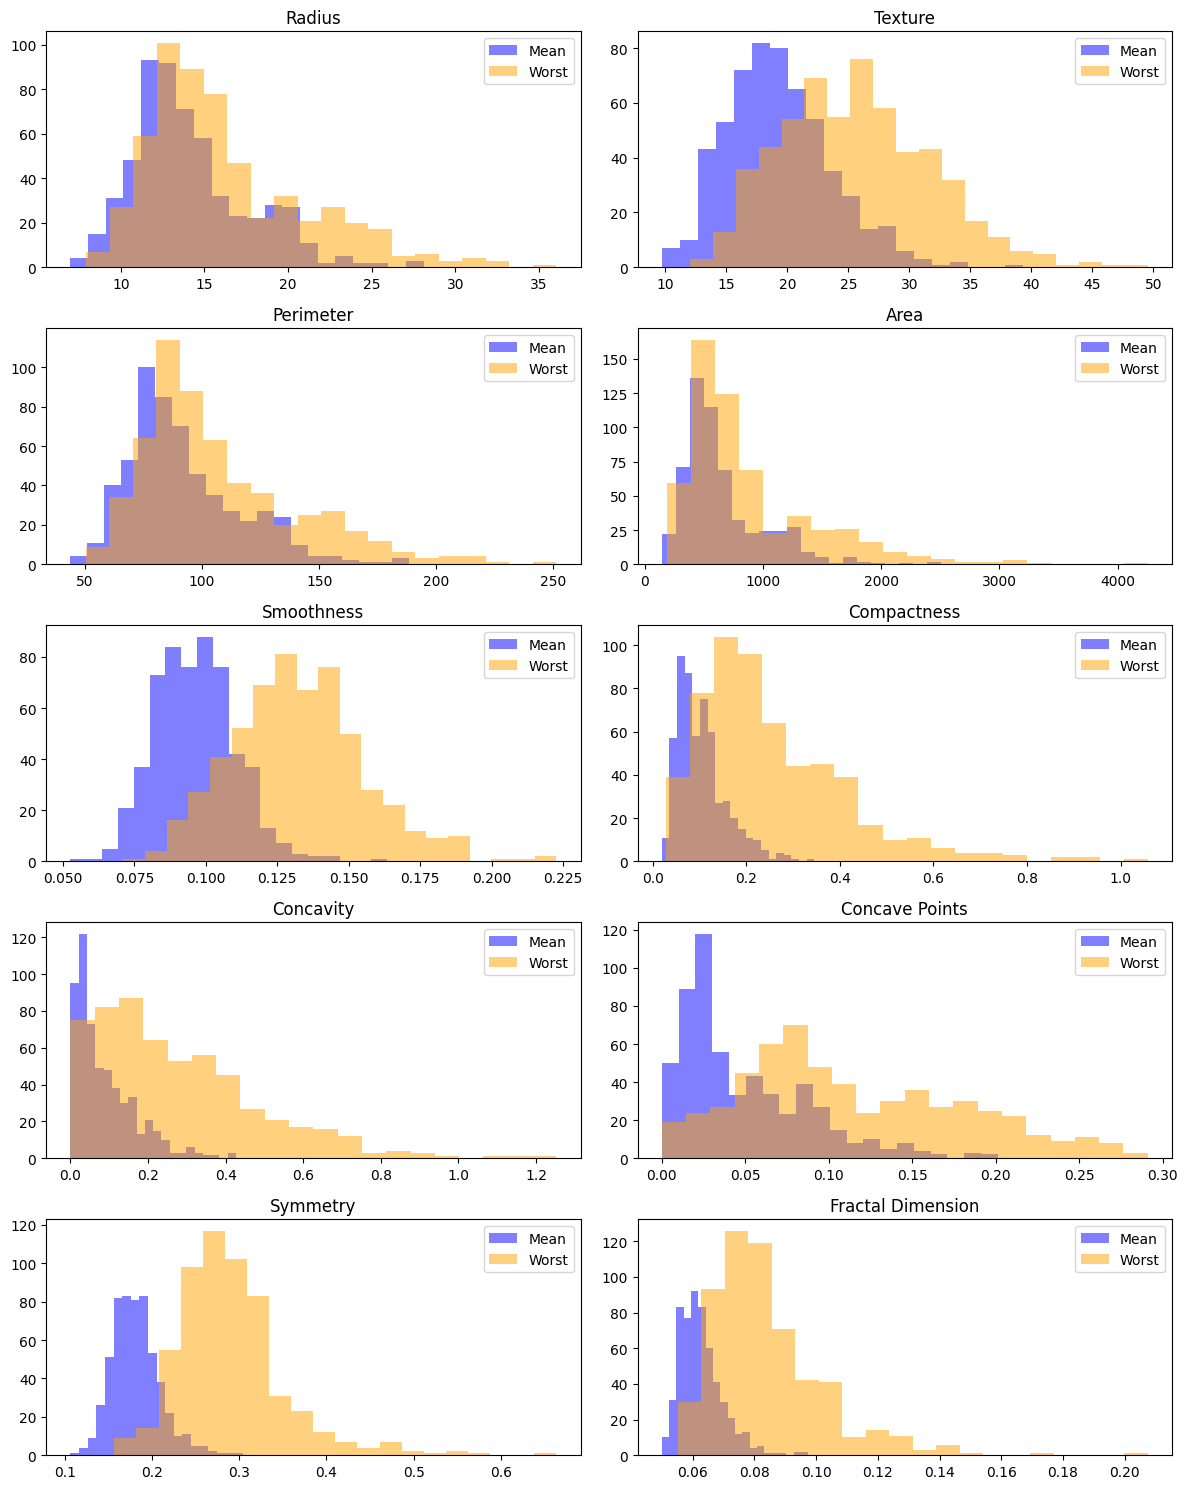

In [63]:
# Get all matching variable stems (without "_mean" or "_worst")
mean_cols = [col for col in df_mean.columns if col.endswith('_mean')]
stems = [col.replace('_mean', '') for col in mean_cols]

# Set up plot
n = len(stems)
ncols = 2
nrows = (n + 1) // ncols

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 3))
axes = axes.flatten()

# Loop through and plot each pair
for i, stem in enumerate(stems):
    mean_col = f'{stem}_mean'
    worst_col = f'{stem}_worst'

    ax = axes[i]
    ax.hist(df_mean[mean_col], bins=20, alpha=0.5, label='Mean', color='blue')
    ax.hist(df_worst[worst_col], bins=20, alpha=0.5, label='Worst', color='orange')
    ax.set_title(stem.replace('_', ' ').title())
    ax.legend()
    ax.grid(False)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


This confirms that "worse" = "larger" for every variable. The variables for `radius_`, `perimeter_`, and `area_` have the least striking differences between the two datasets. The remaining 7 variables have more notable differences.

### Standard Error Variables:

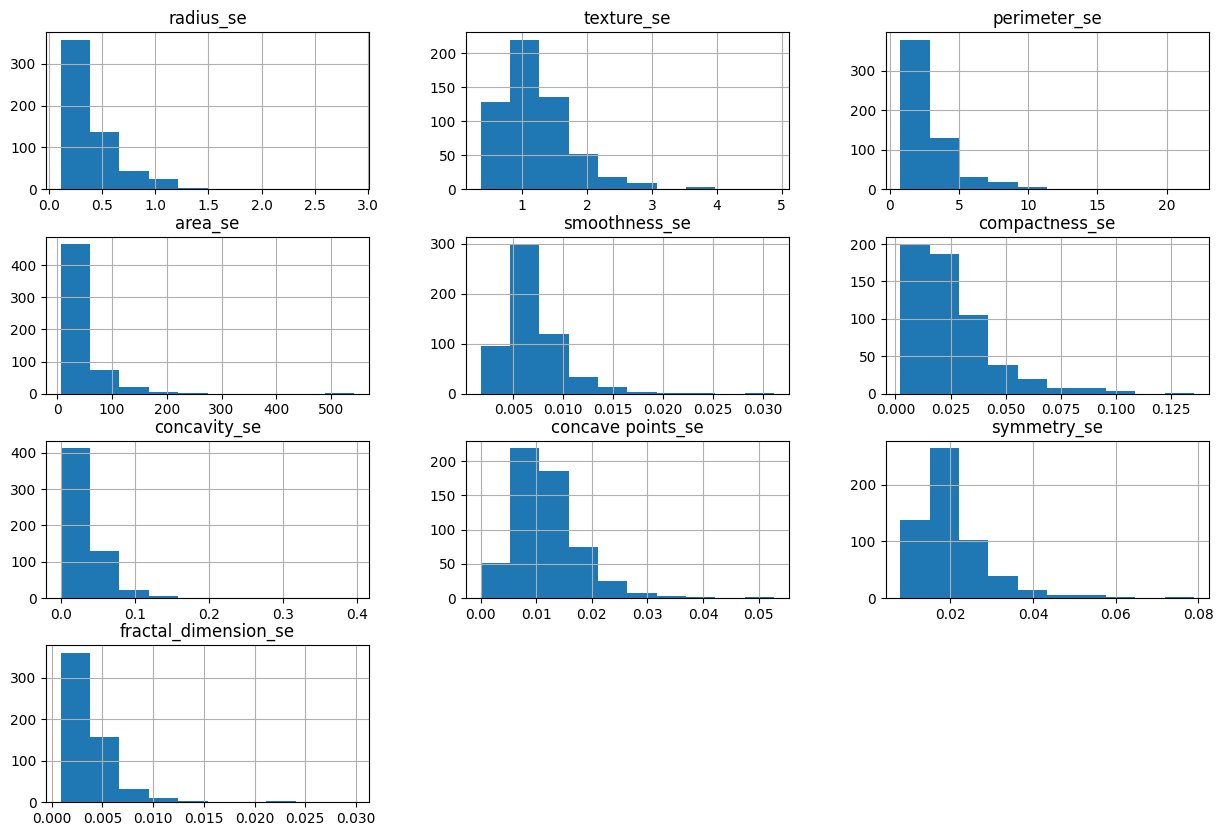

In [64]:
# Create histograms for each standard error variable
df_se.hist(figsize=(15,10));

As expected the largest standard errors are associated with the measurements that use larger values (e.g., `area_`). Like the "mean" and "worst" datasets, all variables are right-skewed. 

### Relationships
To avoid redundancy and improve clarity, I will focus on the `df_mean` variables to evaluate relationships in the data.

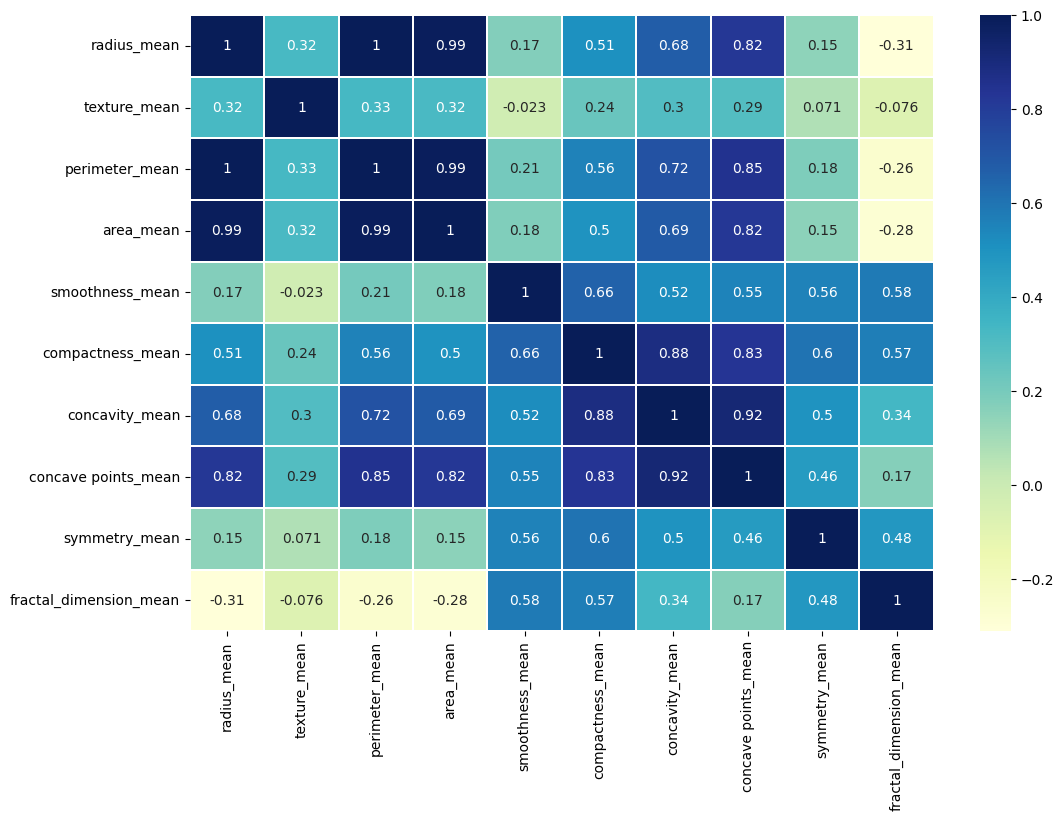

In [67]:
#create the correlation matrix heat map
plt.figure(figsize=(12,8))
sns.heatmap(df_mean.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

It's no surprise that `radius_mean`, `perimeter_mean`, and `area_mean`) are closely correlated, since they are all related geometrical equations.

`concave_points_mean` is also strongly correlated with these variables, most like because larger tumors give space for more concave points. The number of concave points is also associated with `concavity_mean`, which makes sense because more concave points could give rise to more severe concavity. These 2 variables are also strongly correlated with `compactness_mean`.

`smoothness_mean` is moderately correlated with concavity, and slightly more correlated with `compactness_mean`, `symmetry_mean`, and `fractal_dimension_mean`. These 3 variables are all moderately correlated with each other. 

`texture_mean` is the only variable without moderate or strong correlations. There may be a weak correlated with the geometric variables. 

### Questions so far

**Will it be sufficient to use mean variables alone? Do these others just add noise? How should I test this? PCA?**
We saw how similar the distributions of `df_mean` and `df_worst` are. Now just exactly how correlated are the related variables?

In [69]:
# Get all variable stems (remove "_mean" suffix)
mean_cols = [col for col in df_mean.columns if col.endswith('_mean')]
stems = [col.replace('_mean', '') for col in mean_cols]

# Compute correlations
correlations = {
    stem: df_mean[f'{stem}_mean'].corr(df_worst[f'{stem}_worst'])
    for stem in stems
}

# Convert to a DataFrame for readability
corr_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])
corr_df.index.name = 'Variable'
corr_df = corr_df.sort_values(by='Correlation', ascending=False)

corr_df


,Correlation
Variable,
perimeter,0.970387
radius,0.969539
area,0.959213
texture,0.912045
concave points,0.910155
concavity,0.884103
compactness,0.865809
smoothness,0.805324
fractal_dimension,0.767297


Ok, so there is a high correlation between the linked variables. `fractal_dimension` and `symmetry` have the lowest correlation, but still 0.77 and 0.70, respectively. **Should I use both "mean" and "worst" variables, or is one better at predicting tumor diagnosis than the other?** Will have to test this out during the modeling phase.